In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = context.io.load('data_all_features_esp')

2021-02-17 19:35:36,736 - kedro.io.data_catalog - INFO - Loading data from `data_all_features_esp` (CSVDataSet)...


<AxesSubplot:xlabel='Fecha'>

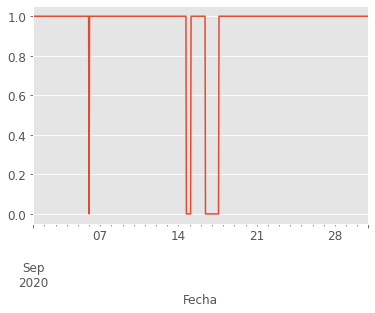

In [50]:
df[['Fecha',
    'on_off_floculante_r3',
#     'on_off_valvulas_descarga_l1_r9',
#     'on_off_valvulas_descarga_l2_r9',
#     'on_off_densimetro_01_r9',
#     'on_off_densimetro_02_r9',
#     'on_off_nivel_interfaz_r9',
    'on_off_flujo_alimentacion_r3'
   ]].set_index('Fecha').loc['2020-09':].all(axis=1).apply(lambda x: 1 if x else 0).plot()

In [8]:
_ = [print(x) for x in df.columns[-70:]]

Solido_SAG
Solido_Convencional
Agua_SAG
Agua_Convencional
Agua_Total
CEA_Total
tph_sag1
tph_sag2
tph_sag_mills
promedio_descarga_bomba_15_16
promedio_descarga_bomba_17_18
flujo_agua_recup_prom
agua_prom_descarga_recuperadores
ph_ca6_suavizado
calc_torque_esp_total
on_off_floculante_r2
on_off_valvulas_descarga_l1_r2
on_off_valvulas_descarga_l2_r2
on_off_densimetro_01_r2
on_off_densimetro_02_r2
on_off_nivel_interfaz_r2
on_off_flujo_alimentacion_r2
on_off_floculante_r3
on_off_valvulas_descarga_l1_r3
on_off_valvulas_descarga_l2_r3
on_off_densimetro_01_r3
on_off_densimetro_02_r3
on_off_nivel_interfaz_r3
on_off_flujo_alimentacion_r3
on_off_floculante_r4
on_off_valvulas_descarga_l1_r4
on_off_valvulas_descarga_l2_r4
on_off_densimetro_01_r4
on_off_densimetro_02_r4
on_off_nivel_interfaz_r4
on_off_flujo_alimentacion_r4
on_off_floculante_r5
on_off_valvulas_descarga_l1_r5
on_off_valvulas_descarga_l2_r5
on_off_densimetro_01_r5
on_off_densimetro_02_r5
on_off_nivel_interfaz_r5
on_off_flujo_alimentacio

In [18]:
df['calc_torque_esp_total'] = df[[
          'target_torque_r10',
          'target_torque_r9',
          'target_torque_r7',
          'target_torque_r6',
          'target_torque_r2',
          'target_torque_r3',
          'target_torque_r4',
          'target_torque_r5'
  ]].mean(axis=1)

In [20]:
df.to_csv('../data/04_feature/data_all_features_esp.csv')

In [36]:
td = context.io.load('td')

2021-01-27 19:11:26,568 - kedro.io.data_catalog - INFO - Loading data from `td` (PickleDataSet)...


In [15]:
np.percentile(daf_esp['r_agua_r10_dit1111_dit1111'].dropna(), q=75)

60.59823541666667

<AxesSubplot:>

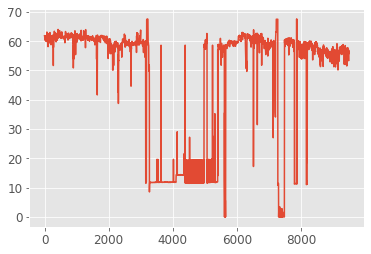

In [16]:
(daf_esp['r_agua_r10_dit1111_dit1111'].dropna()).plot()

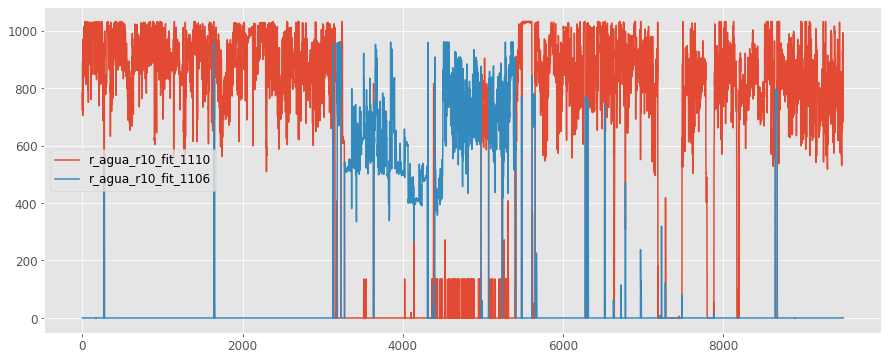

In [17]:
_ = df[['r_agua_r10_fit_1110','r_agua_r10_fit_1106']].plot(figsize=(15,6))

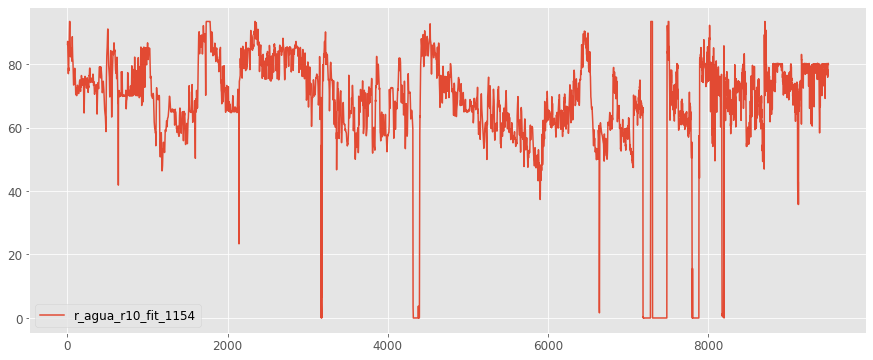

In [18]:
_ = df[['r_agua_r10_fit_1154']].plot(figsize=(15,6))

In [102]:
ch_train_set = context.io.load('r10_esp_ch.train_set')

2021-01-27 20:03:14,117 - kedro.io.data_catalog - INFO - Loading data from `r10_esp_ch.train_set` (CSVDataSet)...


In [103]:
ch_test_set = context.io.load('r10_esp_ch.test_set')

2021-01-27 20:03:28,904 - kedro.io.data_catalog - INFO - Loading data from `r10_esp_ch.test_set` (CSVDataSet)...


<AxesSubplot:xlabel='Fecha'>

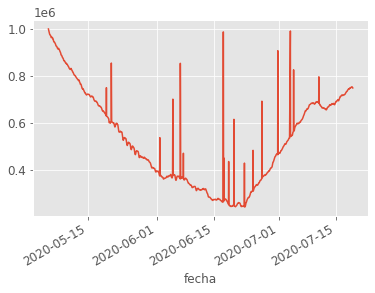

In [105]:
ch_train_set.set_index('Fecha')['rh_volumen_embalse_2'].plot()

<AxesSubplot:xlabel='Fecha'>

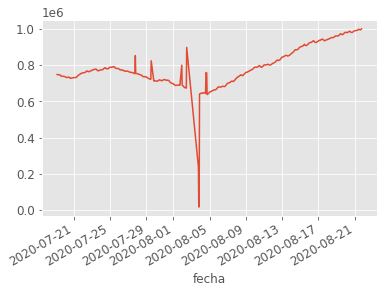

In [106]:
ch_test_set.set_index('Fecha')['rh_volumen_embalse_2'].plot()

In [2]:
data_det = context.io.load('data_det')

2021-01-28 16:16:42,757 - kedro.io.data_catalog - INFO - Loading data from `data_det` (CSVDataSet)...


In [3]:
data_esp = context.io.load('input_data_espesadores_de')

2021-01-28 16:17:23,519 - kedro.io.data_catalog - INFO - Loading data from `input_data_espesadores_de` (CSVDataSet)...


In [8]:
data_det.index.max()

Timestamp('2020-09-30 23:50:00')

In [9]:
dci = context.io.load('data_clean_intermediate_filtered_lasts_months')

2021-01-28 17:02:44,429 - kedro.io.data_catalog - INFO - Loading data from `data_clean_intermediate_filtered_lasts_months` (CSVDataSet)...


In [11]:
dci.Fecha

1296    2020-09-01 00:00:00
1297    2020-09-01 00:10:00
1298    2020-09-01 00:20:00
1299    2020-09-01 00:30:00
1300    2020-09-01 00:40:00
                ...        
56671   2020-08-31 23:10:00
56672   2020-08-31 23:20:00
56673   2020-08-31 23:30:00
56674   2020-08-31 23:40:00
56675   2020-08-31 23:50:00
Name: Fecha, Length: 4356, dtype: datetime64[ns]

In [16]:
def isMonotonic(A): 
  
    return (all(A[i] <= A[i + 1] for i in range(len(A) - 1)) or
            all(A[i] >= A[i + 1] for i in range(len(A) - 1))) 

isMonotonic(dci.sort_values('Fecha').Fecha.to_list())

True

In [ ]:
df_ = df.set_index('Fecha').copy()

<AxesSubplot:xlabel='Fecha'>

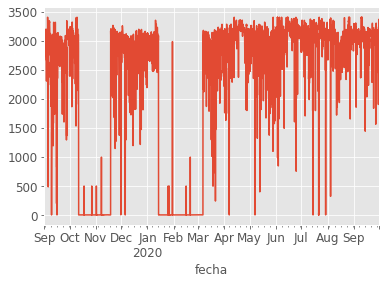

In [27]:
df_['r_agua_r9_a330_fit_905'].plot()

In [32]:
df_[df_[[x for x in df_.columns if 'target' in x.lower()]].any(axis=1)]

Fecha
2019-09-01 00:00:00    True
2019-09-01 01:00:00    True
2019-09-01 02:00:00    True
2019-09-01 03:00:00    True
2019-09-01 04:00:00    True
                       ... 
2020-09-30 19:00:00    True
2020-09-30 20:00:00    True
2020-09-30 21:00:00    True
2020-09-30 22:00:00    True
2020-09-30 23:00:00    True
Length: 9504, dtype: bool

In [39]:
df_[df_[[x for x in df_.columns if 'target' in x.lower()]].isna().any(axis=1)]

,cea_razon_agua_tms_colon,cea_razon_agua_tms_esc,cea_razon_agua_tms_gpta,cea_razon_agua_tms_mfres,cea_razon_agua_tms_munit,cea_razon_agua_tms_sag1,cea_razon_agua_tms_sag2,flo_310_fi43001,flo_310_fic43099_com,flo_310_fic43099_com_op,...,CEA_Total,tph_sag1,tph_sag2,tph_sag_mills,promedio_descarga_bomba_15_16,promedio_descarga_bomba_17_18,flujo_agua_recup_prom,agua_prom_descarga_recuperadores,ph_ca6_suavizado,calc_torque_esp_total
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-09-08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-09-06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [43]:
df_.dropna(subset=[x for x in df_.columns if 'target' in x.lower()])

,cea_razon_agua_tms_colon,cea_razon_agua_tms_esc,cea_razon_agua_tms_gpta,cea_razon_agua_tms_mfres,cea_razon_agua_tms_munit,cea_razon_agua_tms_sag1,cea_razon_agua_tms_sag2,flo_310_fi43001,flo_310_fic43099_com,flo_310_fic43099_com_op,...,CEA_Total,tph_sag1,tph_sag2,tph_sag_mills,promedio_descarga_bomba_15_16,promedio_descarga_bomba_17_18,flujo_agua_recup_prom,agua_prom_descarga_recuperadores,ph_ca6_suavizado,calc_torque_esp_total
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-09-01 00:00:00,2.314917,0.000000,2.314917,0.000000,1.379606,0.932695,0.000000,209.238867,0.000000,0.000000,...,1.341635,1179.728711,2650.559958,3830.288669,1516.157289,967.650425,1357.306187,57.963380,4.307244,12.238450
2019-09-01 01:00:00,2.314917,0.000000,2.314917,0.000000,1.349149,0.957754,0.000000,211.630033,0.000000,0.000000,...,1.438114,1548.888931,2604.893819,4153.782750,1366.871611,1054.172864,1174.378671,59.699454,9.770057,12.163052
2019-09-01 02:00:00,2.314917,0.000000,2.314917,0.000000,1.330898,0.914497,0.000000,207.991000,0.005635,0.000000,...,1.307519,1488.527406,2596.871306,4085.398711,1421.492059,1075.469943,1224.190699,59.684812,9.672903,12.833330
2019-09-01 03:00:00,2.314917,0.000000,2.314917,0.000000,1.322646,1.270661,0.000000,214.173867,0.000000,0.000000,...,1.239240,1196.375668,2525.282528,3721.658196,1358.917778,1086.778405,988.523601,59.575107,9.688898,12.894403
2019-09-01 04:00:00,2.314917,0.000000,2.314917,0.000000,1.323077,0.975170,0.000000,223.240450,0.000000,0.000000,...,1.254601,1112.195347,2035.623861,3147.819208,1299.985850,1097.634118,977.114977,59.438286,10.092421,11.306242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 19:00:00,2.614458,0.000000,2.614458,0.000000,1.323380,0.972404,1.224751,29.930932,423.816983,21.927692,...,1.602711,1444.704500,1365.806711,2810.511211,1142.022315,1463.530423,1448.371482,55.139448,10.024817,20.557038
2020-09-30 20:00:00,2.614458,0.000000,2.614458,0.000000,1.352500,0.892127,1.227015,24.499140,552.498667,24.887198,...,1.262936,1502.979222,2535.522778,4038.502000,1018.484996,1467.314148,1445.500786,55.447813,9.230196,18.879680
2020-09-30 21:00:00,2.614458,0.000000,2.614458,0.000000,1.371279,0.921186,1.224971,27.699663,591.096383,25.834513,...,1.234091,1462.331472,2599.797736,4062.129208,1113.396680,1412.363794,1410.293782,55.561745,9.424031,19.131845


In [44]:
modelo = context.io.load('r10_esp.train_model')

2021-01-28 18:24:50,832 - kedro.io.data_catalog - INFO - Loading data from `r10_esp.train_model` (PickleDataSet)...


In [46]:
modelo = context.io.load('r9_esp.train_model')
modelo

2021-01-28 18:28:20,903 - kedro.io.data_catalog - INFO - Loading data from `r9_esp.train_model` (PickleDataSet)...


Pipeline(steps=[('select_columns',
                 SelectColumns(items=['delta_torque_r9',
                                      'delta_torque_r9_1hora',
                                      'delta_torque_r9_2hora',
                                      'delta_torque_r9_4hora',
                                      'delta_torque_r9_8hora',
                                      'dosificacion_acumulada_floculante_r9',
                                      'promedio_densimetros_r9',
                                      'media_mov_densimetros_r9',
                                      'promedio_apertura_valv_descarga_r9',
                                      'nivel_rastras_r9', 'agua_clara_media_r9',
                                      'flujo_alim...
                                      'CEA_Total', 'tph_sag1', 'tph_sag2',
                                      'tph_sag_mills',
                                      'promedio_descarga_bomba_15_16',
                                    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

td = context.io.load('td')

2021-01-28 19:34:27,791 - kedro.io.data_catalog - INFO - Loading data from `td` (PickleDataSet)...


In [12]:
td.select("r10_feature")

['r_agua_r10_fit_1154',
 'r_agua_r10_fit_1106',
 'r_agua_r10_fit_1110',
 'delta_torque_r10',
 'delta_torque_r10_1hora',
 'delta_torque_r10_2hora',
 'delta_torque_r10_4hora',
 'delta_torque_r10_8hora',
 'promedio_densimetros_r10',
 'media_mov_densimetros_r10',
 'nivel_interfaz_r10',
 'turbidez_r10',
 'presion_cono_decimal_suav_r10',
 'presion_cono_decimal_r10',
 'delta_presion_cono_decimal_r10',
 'Agua_Fresca_Colon',
 'Procesamiento_SAG',
 'Procesamiento_Convencional',
 'Procesamiento_Total',
 'Solido_SAG',
 'Solido_Convencional',
 'Agua_SAG',
 'Agua_Convencional',
 'Agua_Total',
 'CEA_Total',
 'tph_sag1',
 'tph_sag2',
 'tph_sag_mills',
 'promedio_descarga_bomba_15_16',
 'promedio_descarga_bomba_17_18',
 'flujo_agua_recup_prom',
 'agua_prom_descarga_recuperadores',
 'ph_ca6_suavizado']

In [ ]:
uuid = 